# **Esguerra, Nashrudin Maverick A.**
# **BSCS-IS-3B**

# **Assessment Task: Pollution Data Time Series Analysis Using ARIMA**

# **Import Libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# **Importing Dataset**

In [ ]:
#Importing Dataset
df = pd.read_csv("most-polluted-countries.csv")

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(df.head())

# **1. Dataset Preparation**

In [ ]:
# Simulate time series data for annual pollution levels
years = pd.date_range(start='2023', periods=10, freq='Y')
pollution_data = np.random.normal(loc=50, scale=10, size=10)

# Create a DataFrame for the simulated data
simulated_df = pd.DataFrame({'Year': years, 'Pollution': pollution_data})
simulated_df.set_index('Year', inplace=True)


 #Plot the time series of simulated data
plt.figure(figsize=(10, 6))
plt.plot(simulated_df.index, simulated_df['Pollution'], marker='o')
plt.title('Annual Pollution Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.grid(True)
plt.show()

# **2. Stationarity Testing**

In [ ]:
# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(simulated_df['Pollution'])
print('ADF Statistic:', adf_result[0])
print('P_value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -2.6763827501796147
P_value: 0.07821500325411075
Critical Values:
	1%: -4.473135048010974
	5%: -3.28988060356653
	10%: -2.7723823456790124


# **3. ARIMA Model Identification**

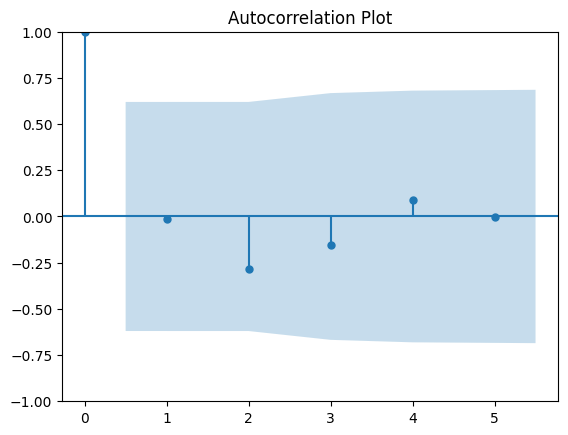

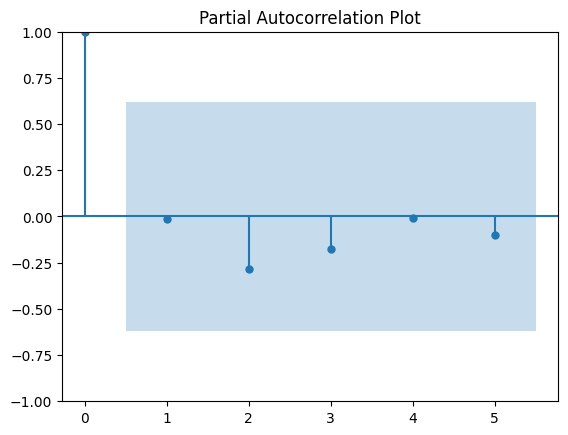

In [ ]:
# Plot autocorrelation and partial autocorrelation plots to identify ARIMA parameters
plot_acf(simulated_df['Pollution'])
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(simulated_df['Pollution'])
plt.title('Partial Autocorrelation Plot')
plt.show()

# **4. ARIMA Model Fitting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


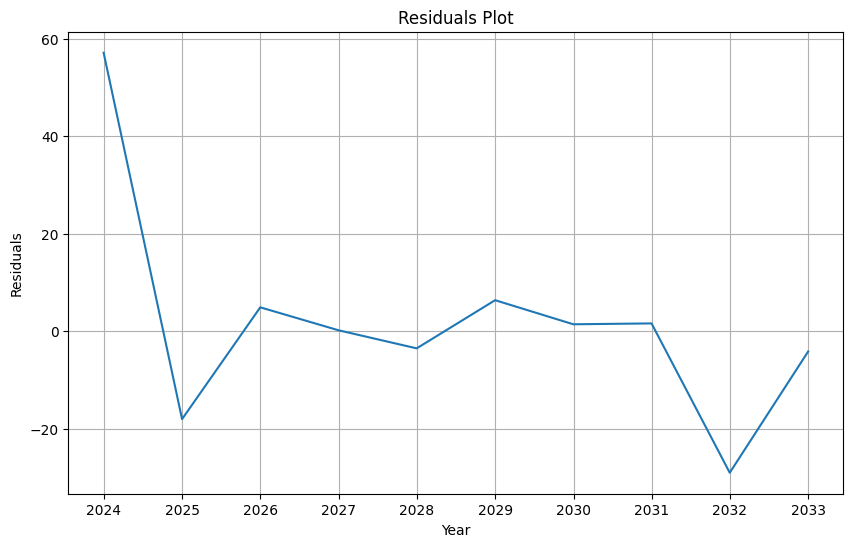

In [ ]:
# Fit ARIMA model to the simulated data
arima_model = ARIMA(simulated_df['Pollution'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Evaluate model fit by plotting residuals
residuals = arima_model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# **5. Forecasting**

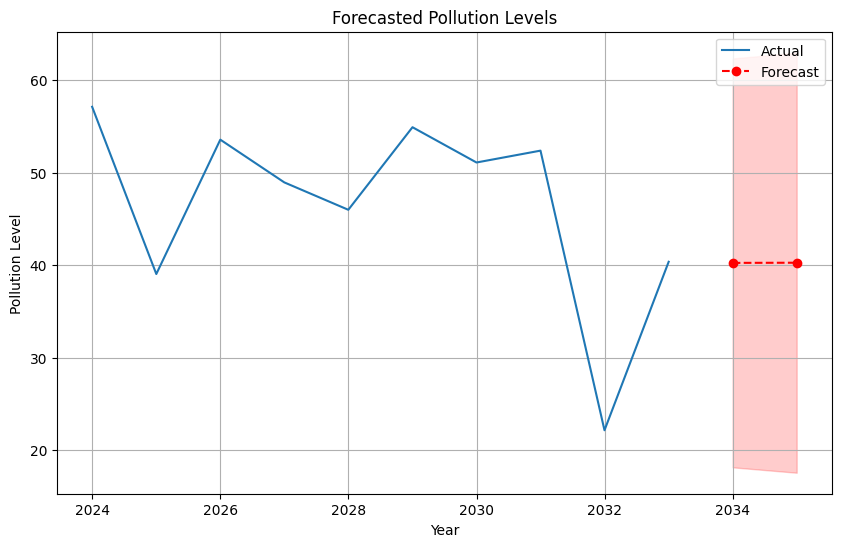

In [ ]:
# Forecast pollution levels for the next 2 years
forecast_steps = 2
forecast = arima_model_fit.forecast(steps=forecast_steps)

# Get confidence interval
confidence_interval = arima_model_fit.get_forecast(steps=forecast_steps).conf_int()

# Plot the forecast along with confidence interval
forecast_index = pd.date_range(start=years[-1], periods=forecast_steps + 1, freq='Y')[1:]
plt.figure(figsize=(10, 6))
plt.plot(simulated_df.index, simulated_df['Pollution'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', marker='o', color='red')
plt.fill_between(forecast_index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='red', alpha=0.2)
plt.title('Forecasted Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()

# **6. Report and Insights**

In [ ]:
# Print forecasted values and calculate RMSE
print('Forecasted Pollution Levels for the Next 2 Years:')
forecast_df = pd.DataFrame({'Year': forecast_index, 'Forecast': forecast})
print(forecast_df)

# Calculate Root Mean Squared Error (RMSE)
actual_values = simulated_df['Pollution'][-forecast_steps:]
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Forecasted Pollution Levels for the Next 2 Years:
                 Year   Forecast
2033-12-31 2033-12-31  40.236752
2034-12-31 2034-12-31  40.254524
Root Mean Squared Error (RMSE): 12.791812915326283
